In [1]:
import pandas as pd

datasets = {
    "patients": pd.read_csv("patients.csv"),
    "ADMISSIONS": pd.read_csv("ADMISSIONS.csv"),
    "ICUSTAYS": pd.read_csv("ICUSTAYS.csv"),
    "CHARTEVENTS": pd.read_csv("CHARTEVENTS.csv"),
    "LABEVENTS": pd.read_csv("LABEVENTS.csv"),
    "PRESCRIPTIONS": pd.read_csv("PRESCRIPTIONS.csv"),
    "DIAGNOSES_ICD": pd.read_csv("DIAGNOSES_ICD.csv"),
    "NOTEEVENTS": pd.read_csv("NOTEEVENTS.csv"),
    "CPTEVENTS": pd.read_csv("CPTEVENTS.csv"),
    "OUTPUTEVENTS": pd.read_csv("OUTPUTEVENTS.csv"),
}

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_63662/3700576556.py:7: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  "CHARTEVENTS": pd.read_csv("CHARTEVENTS.csv"),


In [2]:
# Dataset Information

def display_dataset_info(df, name):
    print(f"\n {name} Dataset")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("-" * 50)
    
for name, df in datasets.items():  # Looping through each dataset and display info
    display_dataset_info(df, name)


 patients Dataset
Shape: (100, 8)

First 5 rows:
   row_id  subject_id gender                  dob                  dod  \
0    9467       10006      F  2094-03-05 00:00:00  2165-08-12 00:00:00   
1    9472       10011      F  2090-06-05 00:00:00  2126-08-28 00:00:00   
2    9474       10013      F  2038-09-03 00:00:00  2125-10-07 00:00:00   
3    9478       10017      F  2075-09-21 00:00:00  2152-09-12 00:00:00   
4    9479       10019      M  2114-06-20 00:00:00  2163-05-15 00:00:00   

              dod_hosp              dod_ssn  expire_flag  
0  2165-08-12 00:00:00  2165-08-12 00:00:00            1  
1  2126-08-28 00:00:00                  NaN            1  
2  2125-10-07 00:00:00  2125-10-07 00:00:00            1  
3                  NaN  2152-09-12 00:00:00            1  
4  2163-05-15 00:00:00  2163-05-15 00:00:00            1  

Missing Values:
row_id          0
subject_id      0
gender          0
dob             0
dod             0
dod_hosp       30
dod_ssn        23
expire_f

In [3]:
# Data Cleaning
patients = datasets["patients"]

# Converting datetime columns
patients['dob'] = pd.to_datetime(patients['dob'])
patients['dod'] = pd.to_datetime(patients['dod'], errors='coerce')
patients['dod_hosp'] = pd.to_datetime(patients['dod_hosp'], errors='coerce')
patients['dod_ssn'] = pd.to_datetime(patients['dod_ssn'], errors='coerce')

# Filling missing values
patients['dod_hosp'] = patients['dod_hosp'].fillna("Alive")
patients['dod_ssn'] = patients['dod_ssn'].fillna("Alive")


In [4]:
# ADMISSIONS.csv

admissions = datasets["ADMISSIONS"]

# Convert datetime columns
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])
admissions['deathtime'] = pd.to_datetime(admissions['deathtime'], errors='coerce')

# Fill missing values
admissions['language'] = admissions['language'].fillna("Unknown")
admissions['marital_status'] = admissions['marital_status'].fillna("Unknown")
admissions['edregtime'] = pd.to_datetime(admissions['edregtime'], errors='coerce')
admissions['edouttime'] = pd.to_datetime(admissions['edouttime'], errors='coerce')

In [5]:
#ICUSTAYS.csv
icustays = datasets["ICUSTAYS"]

# Convert datetime columns
icustays['intime'] = pd.to_datetime(icustays['intime'])
icustays['outtime'] = pd.to_datetime(icustays['outtime'])

In [6]:
#CHARTEVENTS.csv
chartevents = datasets["CHARTEVENTS"]

# Convert datetime columns
chartevents['charttime'] = pd.to_datetime(chartevents['charttime'])
chartevents['storetime'] = pd.to_datetime(chartevents['storetime'], errors='coerce')

# Drop rows with missing valuenum (critical for analysis)
chartevents = chartevents.dropna(subset=['valuenum'])

# Drop unnecessary columns with high missingness
chartevents = chartevents.drop(columns=['warning', 'error', 'resultstatus', 'stopped'])

In [7]:
#LABEVENTS.csv
labevents = datasets["LABEVENTS"]

# Drop rows with missing hadm_id (cannot link to admissions)
labevents = labevents.dropna(subset=['hadm_id'])

# Convert datetime columns
labevents['charttime'] = pd.to_datetime(labevents['charttime'])

# Drop rows with missing valuenum (critical for analysis)
labevents = labevents.dropna(subset=['valuenum'])

# Drop unnecessary columns
labevents = labevents.drop(columns=['valueuom', 'flag'])

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_63662/3098953352.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labevents['charttime'] = pd.to_datetime(labevents['charttime'])


In [8]:
patients.to_csv('PATIENTS_cleaned.csv', index=False)
admissions.to_csv('ADMISSIONS_cleaned.csv', index=False)
icustays.to_csv('ICUSTAYS_cleaned.csv', index=False)
chartevents.to_csv('CHARTEVENTS_cleaned.csv', index=False)
labevents.to_csv('LABEVENTS_cleaned.csv', index=False)

In [9]:
merged_data = pd.merge(patients, admissions, on='subject_id', how='inner')

# Merge with ICUSTAYS on subject_id and hadm_id
merged_data = pd.merge(merged_data, icustays, on=['subject_id', 'hadm_id'], how='inner')

# Save merged dataset
merged_data.to_csv('MERGED_DATA.csv', index=False)

In [10]:
# Calculate age at admission (in years)
merged_data['age'] = (merged_data['admittime'].dt.year - merged_data['dob'].dt.year)

# Calculate length of stay (LOS) in days
merged_data['los_days'] = (merged_data['dischtime'] - merged_data['admittime']).dt.days

# Extract hour of admission and day of the week
merged_data['admit_hour'] = merged_data['admittime'].dt.hour
merged_data['admit_dayofweek'] = merged_data['admittime'].dt.day_name()

# Save the final dataset with new features
merged_data.to_csv('MERGED_DATA_cleaned_final.csv', index=False)

In [11]:
# Function to check null values
def check_null_values(df, name):
    print(f"\n===== Null Values in {name} =====")
    print(df.isnull().sum())

# Load cleaned datasets
patients_cleaned = pd.read_csv('PATIENTS_cleaned.csv')
admissions_cleaned = pd.read_csv('ADMISSIONS_cleaned.csv')
icustays_cleaned = pd.read_csv('ICUSTAYS_cleaned.csv')
chartevents_cleaned = pd.read_csv('CHARTEVENTS_cleaned.csv')
labevents_cleaned = pd.read_csv('LABEVENTS_cleaned.csv')
merged_data = pd.read_csv('MERGED_DATA_cleaned_final.csv')

# Check null values in each cleaned dataset
check_null_values(patients_cleaned, "PATIENTS")
check_null_values(admissions_cleaned, "ADMISSIONS")
check_null_values(icustays_cleaned, "ICUSTAYS")
check_null_values(chartevents_cleaned, "CHARTEVENTS")
check_null_values(labevents_cleaned, "LABEVENTS")
check_null_values(merged_data, "MERGED_DATA")


===== Null Values in PATIENTS =====
row_id         0
subject_id     0
gender         0
dob            0
dod            0
dod_hosp       0
dod_ssn        0
expire_flag    0
dtype: int64

===== Null Values in ADMISSIONS =====
row_id                   0
subject_id               0
hadm_id                  0
admittime                0
dischtime                0
deathtime               89
admission_type           0
admission_location       0
discharge_location       0
insurance                0
language                 0
religion                 1
marital_status           0
ethnicity                0
edregtime               37
edouttime               37
diagnosis                0
hospital_expire_flag     0
has_chartevents_data     0
dtype: int64

===== Null Values in ICUSTAYS =====
row_id            0
subject_id        0
hadm_id           0
icustay_id        0
dbsource          0
first_careunit    0
last_careunit     0
first_wardid      0
last_wardid       0
intime            0
outtime     

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_46650/3387631678.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents_cleaned = pd.read_csv('CHARTEVENTS_cleaned.csv')


In [11]:
# Fill deathtime with "Alive"
admissions['deathtime'] = admissions['deathtime'].fillna("Alive")

# Fill religion with "Unknown"
admissions['religion'] = admissions['religion'].fillna("Unknown")

# Drop rows with missing edregtime and edouttime (or impute if needed)
admissions = admissions.dropna(subset=['edregtime', 'edouttime'])

# Save the cleaned dataset
admissions.to_csv('ADMISSIONS_cleaned_final.csv', index=False)


# Drop rows with missing icustay_id (if critical for analysis)
chartevents = chartevents.dropna(subset=['icustay_id'])

# Drop rows with missing value (or impute based on valuenum)
chartevents = chartevents.dropna(subset=['value'])

# Drop the valueuom column (if not critical for analysis)
chartevents = chartevents.drop(columns=['valueuom'])

# Save the cleaned dataset
chartevents.to_csv('CHARTEVENTS_cleaned_final.csv', index=False)

merged_data['deathtime'] = merged_data['deathtime'].fillna("Alive")

# Fill religion with "Unknown"
merged_data['religion'] = merged_data['religion'].fillna("Unknown")

# Drop rows with missing edregtime and edouttime (or impute if needed)
merged_data = merged_data.dropna(subset=['edregtime', 'edouttime'])

# Save the cleaned dataset
merged_data.to_csv('MERGED_DATA_cleaned_final.csv', index=False)

In [13]:
# Function to check null values
def check_null_values(df, name):
    print(f"\n===== Null Values in {name} =====")
    print(df.isnull().sum())

# Load cleaned datasets
admissions_cleaned = pd.read_csv('ADMISSIONS_cleaned_final.csv')
chartevents_cleaned = pd.read_csv('CHARTEVENTS_cleaned_final.csv')
merged_data = pd.read_csv('MERGED_DATA_cleaned_final.csv')

# Check null values in each cleaned dataset
check_null_values(admissions_cleaned, "ADMISSIONS")
check_null_values(chartevents_cleaned, "CHARTEVENTS")
check_null_values(merged_data, "MERGED_DATA")


===== Null Values in ADMISSIONS =====
row_id                  0
subject_id              0
hadm_id                 0
admittime               0
dischtime               0
deathtime               0
admission_type          0
admission_location      0
discharge_location      0
insurance               0
language                0
religion                0
marital_status          0
ethnicity               0
edregtime               0
edouttime               0
diagnosis               0
hospital_expire_flag    0
has_chartevents_data    0
dtype: int64

===== Null Values in CHARTEVENTS =====
row_id        0
subject_id    0
hadm_id       0
icustay_id    0
itemid        0
charttime     0
storetime     0
cgid          0
value         0
valuenum      0
dtype: int64

===== Null Values in MERGED_DATA =====
row_id_x                0
subject_id              0
gender                  0
dob                     0
dod                     0
dod_hosp                0
dod_ssn                 0
expire_flag        

/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_46650/529504768.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents_cleaned = pd.read_csv('CHARTEVENTS_cleaned_final.csv')


In [12]:
import pandas as pd
import numpy as np

# Load the final merged data
merged_data = pd.read_csv('MERGED_DATA_cleaned_final.csv', parse_dates=['admittime', 'dischtime', 'dob'])

# Create a mortality indicator: 1 if deathtime is not "Alive", else 0
merged_data['mortality'] = np.where(merged_data['deathtime'] != "Alive", 1, 0)

# Convert deathtime to datetime where possible (for survivors it will remain NaT)
merged_data['deathtime'] = pd.to_datetime(merged_data['deathtime'], errors='coerce')

# Display the new columns to verify
print(merged_data[['deathtime', 'mortality']].head())


  deathtime  mortality
0       NaT          0
1       NaT          0
2       NaT          0
3       NaT          0
4       NaT          0


/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_63662/1109987185.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['deathtime'] = pd.to_datetime(merged_data['deathtime'], errors='coerce')


# Age Distribution

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


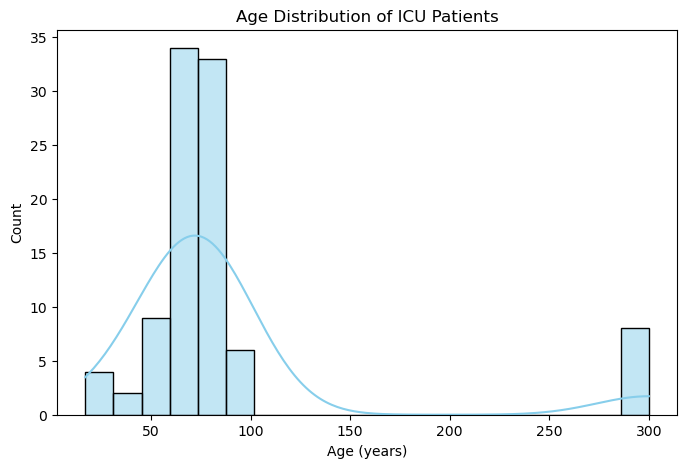

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(merged_data['age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of ICU Patients')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()


# Gender Distribution

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


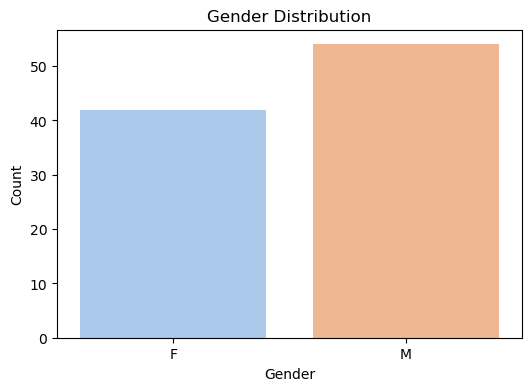

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=merged_data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Mortality Rate: 32.29%


/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


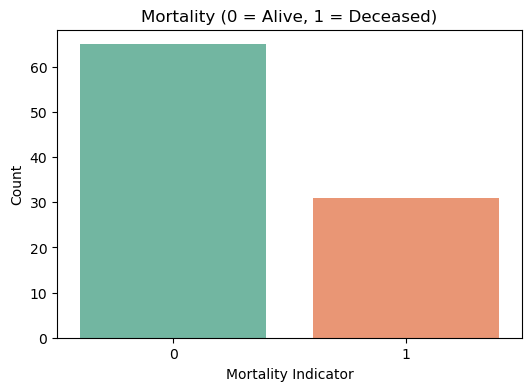

In [18]:
mortality_rate = merged_data['mortality'].mean() * 100
print(f"Mortality Rate: {mortality_rate:.2f}%")

plt.figure(figsize=(6, 4))
sns.countplot(x='mortality', data=merged_data, palette='Set2')
plt.title('Mortality (0 = Alive, 1 = Deceased)')
plt.xlabel('Mortality Indicator')
plt.ylabel('Count')
plt.show()


# Ethicity Distribution

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


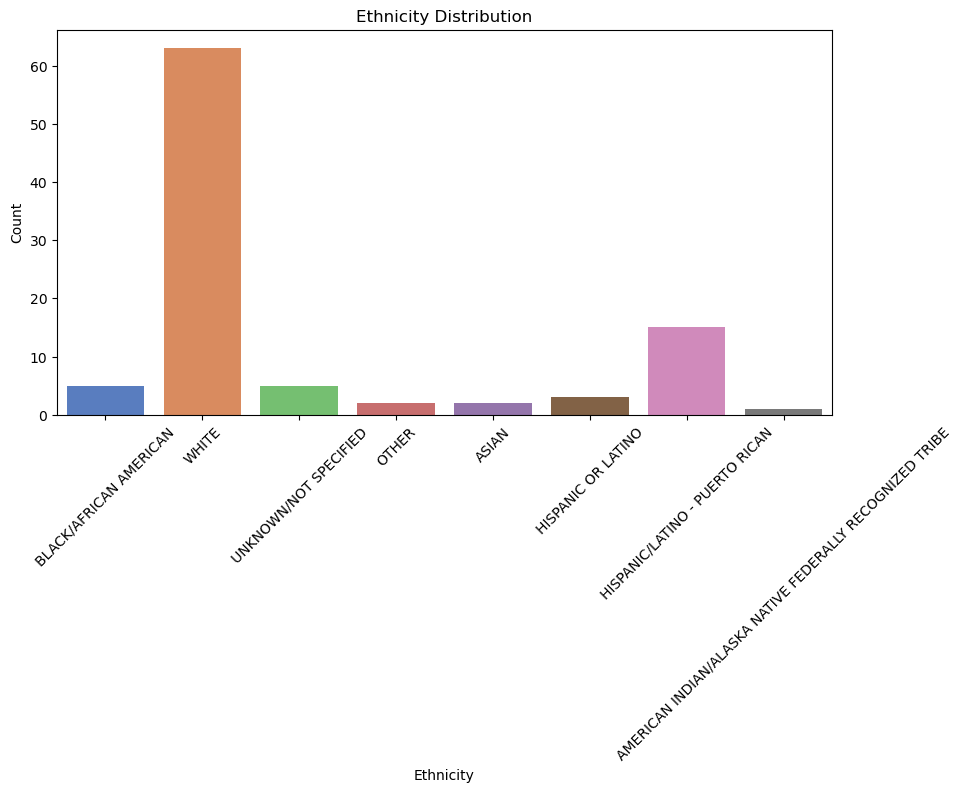

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x='ethnicity', data=merged_data, palette='muted')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Morality Rate

Mortality Rate: 32.29%


/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


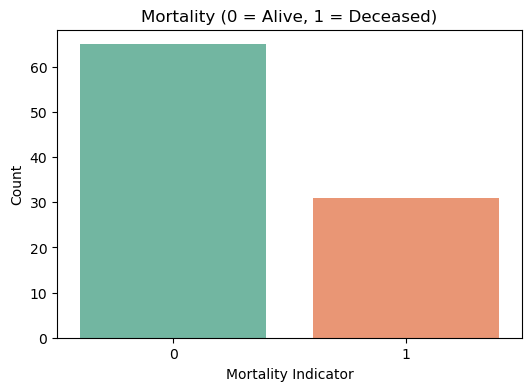

In [23]:
mortality_rate = merged_data['mortality'].mean() * 100
print(f"Mortality Rate: {mortality_rate:.2f}%")

plt.figure(figsize=(6, 4))
sns.countplot(x='mortality', data=merged_data, palette='Set2')
plt.title('Mortality (0 = Alive, 1 = Deceased)')
plt.xlabel('Mortality Indicator')
plt.ylabel('Count')
plt.show()


# Length of stay

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


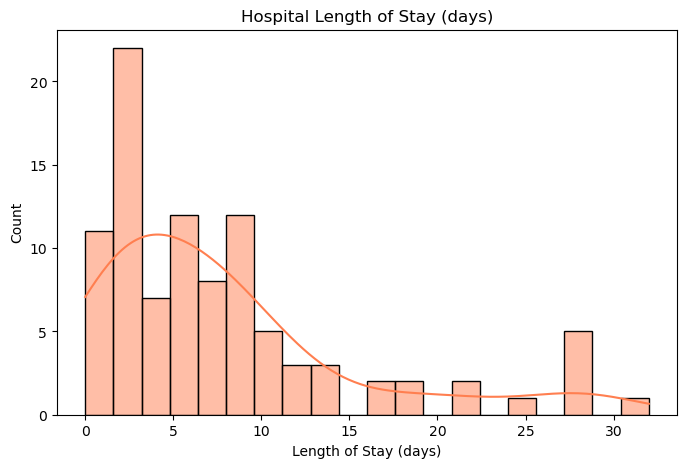

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['los_days'], kde=True, bins=20, color='coral')
plt.title('Hospital Length of Stay (days)')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Count')
plt.show()


# Admission Hour and Day of Week

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


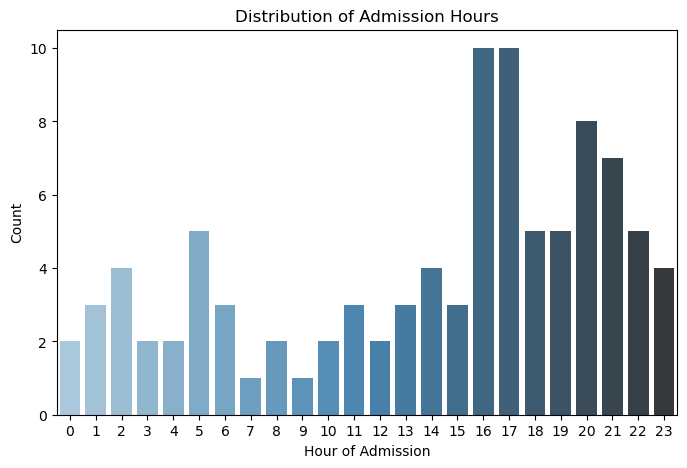

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


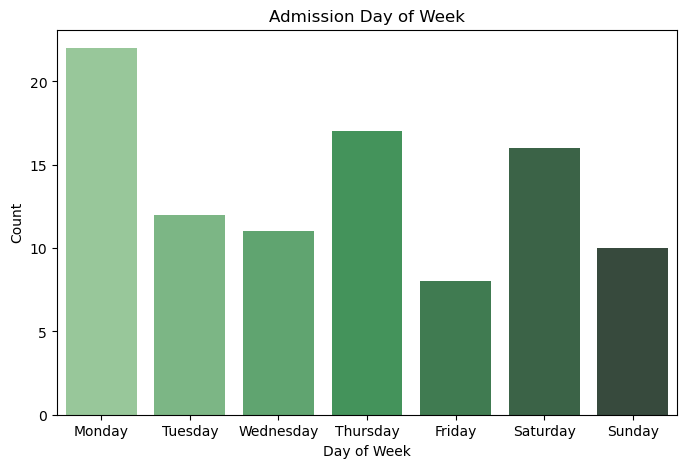

In [20]:
# Admission Hour Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='admit_hour', data=merged_data, palette='Blues_d')
plt.title('Distribution of Admission Hours')
plt.xlabel('Hour of Admission')
plt.ylabel('Count')
plt.show()

# Day of Week Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='admit_dayofweek', data=merged_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Greens_d')
plt.title('Admission Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()


# Correlation Heatmap

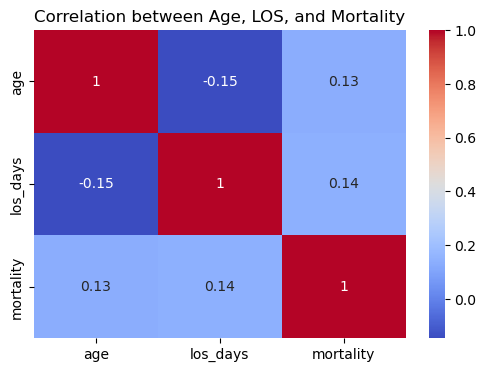

In [21]:
# Select relevant numerical features
numeric_features = ['age', 'los_days', 'mortality']
corr_matrix = merged_data[numeric_features].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Age, LOS, and Mortality')
plt.show()


# Scatter Plot: Age vs. Length of Stay

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype

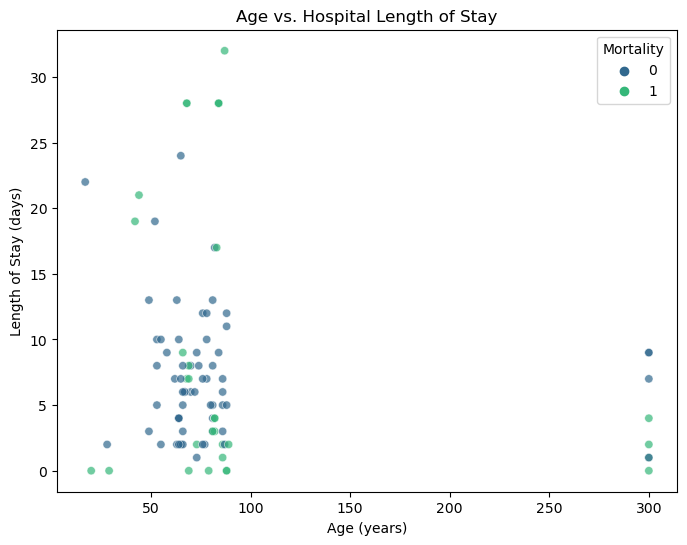

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='los_days', hue='mortality', data=merged_data, palette='viridis', alpha=0.7)
plt.title('Age vs. Hospital Length of Stay')
plt.xlabel('Age (years)')
plt.ylabel('Length of Stay (days)')
plt.legend(title='Mortality')
plt.show()


/var/folders/k4/8yy8wb052bz4q0y3xvcpc62w0000gn/T/ipykernel_46650/2566750416.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents = pd.read_csv('CHARTEVENTS_cleaned_final.csv', parse_dates=['charttime', 'storetime'])


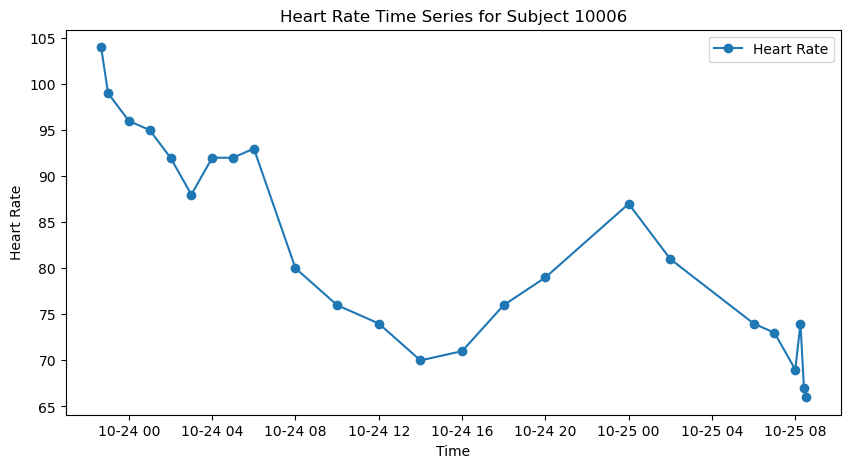

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned CHARTEVENTS dataset (ensure datetime columns are parsed)
chartevents = pd.read_csv('CHARTEVENTS_cleaned_final.csv', parse_dates=['charttime', 'storetime'])

# For demonstration, select a sample subject.
sample_subject = 10006  # Change this to an appropriate subject_id

# Assuming heart rate is identified by a specific itemid (update this based on your metadata)
heart_rate_itemid = 211  # Replace with the correct itemid for heart rate if different

# Filter CHARTEVENTS for the sample subject and heart rate measurements
heart_rate_data = chartevents[
    (chartevents['subject_id'] == sample_subject) &
    (chartevents['itemid'] == heart_rate_itemid)
]

# Plot the heart rate time series
plt.figure(figsize=(10, 5))
plt.plot(heart_rate_data['charttime'], heart_rate_data['valuenum'], marker='o', linestyle='-', label='Heart Rate')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title(f'Heart Rate Time Series for Subject {sample_subject}')
plt.legend()
plt.show()

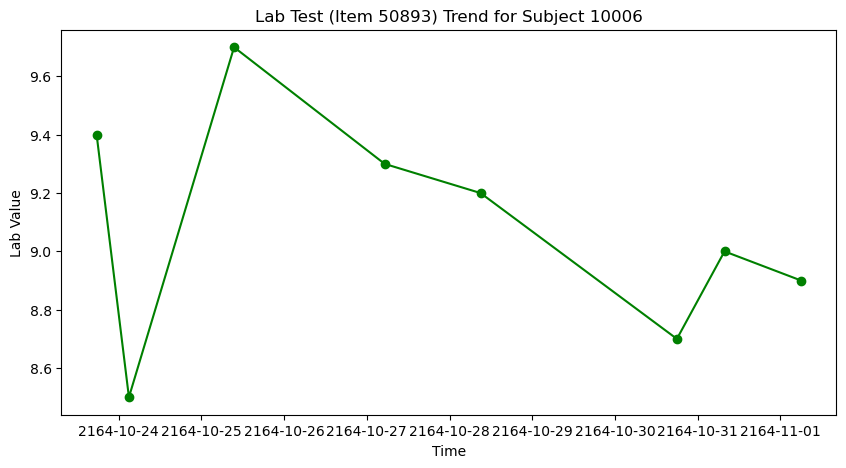

In [26]:
# Load cleaned LABEVENTS dataset (ensure datetime columns are parsed)
labevents = pd.read_csv('LABEVENTS_cleaned.csv', parse_dates=['charttime'])

# Assume we are interested in a specific lab test identified by its itemid.
lab_item_id = 50893  # Change this to the itemid for the lab test of interest

# Filter LABEVENTS for the chosen lab test
lab_data = labevents[labevents['itemid'] == lab_item_id]

# Further filter by a sample subject
lab_sample_subject = 10006  # Change as needed
lab_data_subject = lab_data[lab_data['subject_id'] == lab_sample_subject]

# Plot the lab test trend over time
plt.figure(figsize=(10, 5))
plt.plot(lab_data_subject['charttime'], lab_data_subject['valuenum'], marker='o', linestyle='-', color='green')
plt.xlabel('Time')
plt.ylabel('Lab Value')
plt.title(f'Lab Test (Item {lab_item_id}) Trend for Subject {lab_sample_subject}')
plt.show()

/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


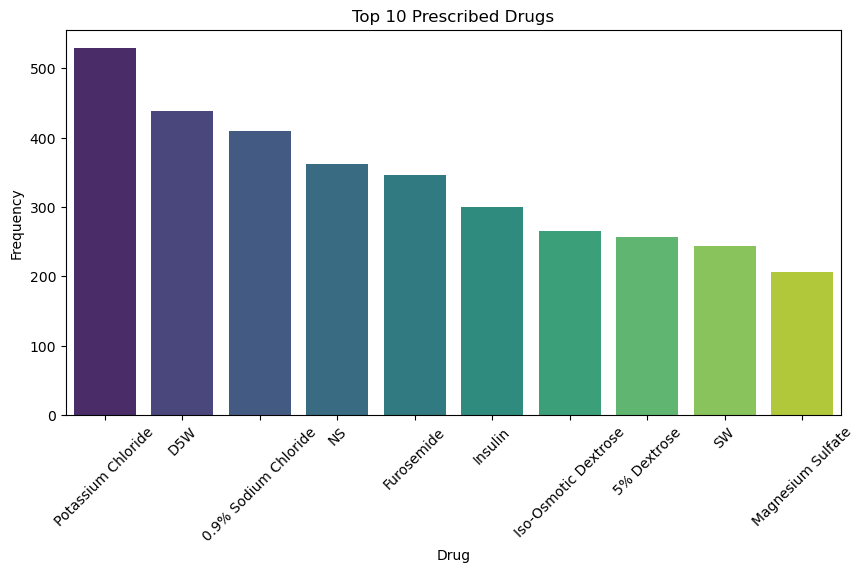

In [27]:
# Load the PRESCRIPTIONS dataset (if not already cleaned, adjust file name accordingly)
prescriptions = pd.read_csv('PRESCRIPTIONS.csv')

# Count the frequency of prescribed drugs using the 'drug' column
drug_counts = prescriptions['drug'].value_counts().head(10)

# Plot the top 10 prescribed drugs
plt.figure(figsize=(10, 5))
sns.barplot(x=drug_counts.index, y=drug_counts.values, palette='viridis')
plt.xlabel('Drug')
plt.ylabel('Frequency')
plt.title('Top 10 Prescribed Drugs')
plt.xticks(rotation=45)
plt.show()


/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/venkatanagasharanyakhanderao/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


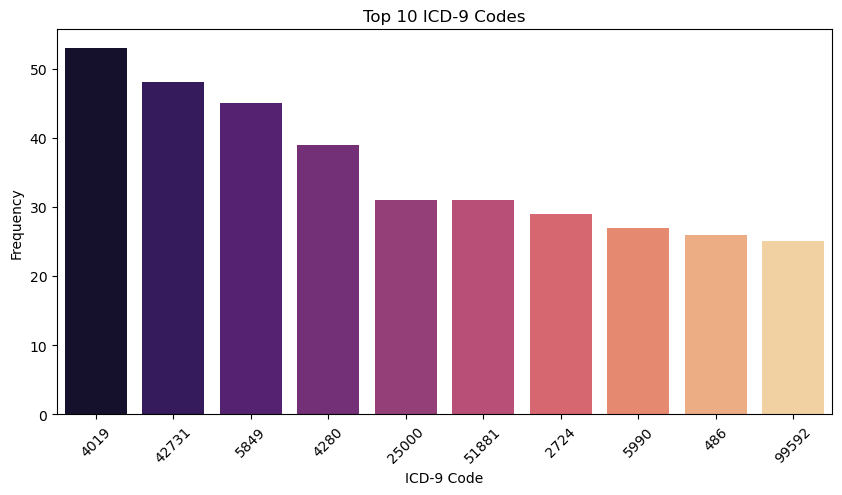

In [28]:
# Load the DIAGNOSES_ICD dataset
diagnoses = pd.read_csv('DIAGNOSES_ICD.csv')

# Count frequency of ICD-9 codes
icd_counts = diagnoses['icd9_code'].value_counts().head(10)

# Plot the top 10 ICD-9 codes
plt.figure(figsize=(10, 5))
sns.barplot(x=icd_counts.index, y=icd_counts.values, palette='magma')
plt.xlabel('ICD-9 Code')
plt.ylabel('Frequency')
plt.title('Top 10 ICD-9 Codes')
plt.xticks(rotation=45)
plt.show()